# Model building and evaluation for titanic dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Users/Hp/OneDrive/Documents/mru/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Exploratory Data Analysis

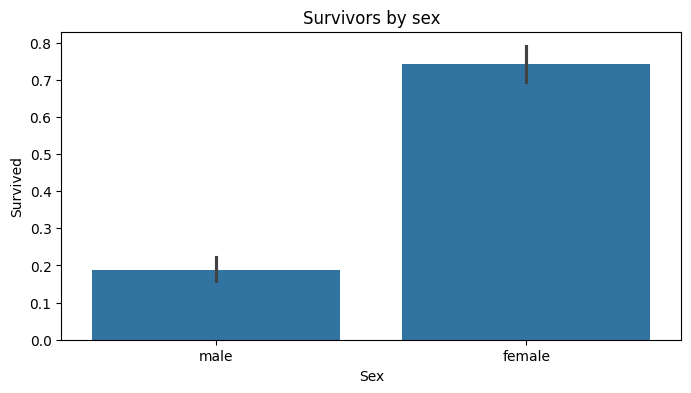

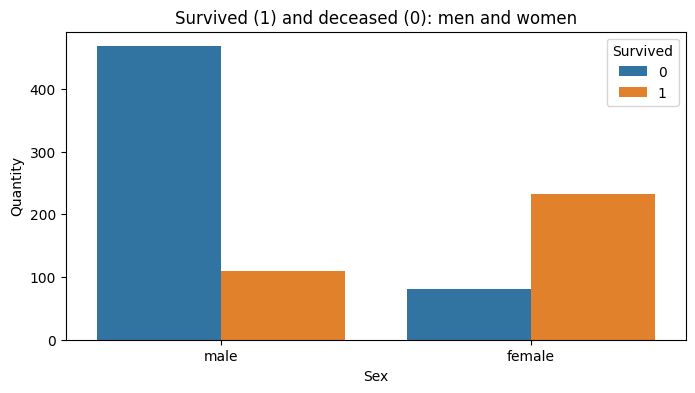

In [5]:
import seaborn as sns

# Plot 1 - bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survivors by sex')

# Plot 2 - count plot with hue
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.ylabel('Quantity')
plt.title('Survived (1) and deceased (0): men and women')

plt.show()

In [6]:
# Selecting relevant features

In [7]:
x=data[['PassengerId','Sex']].values
y=data['Survived'].values

In [8]:
x

array([[1, 'male'],
       [2, 'female'],
       [3, 'female'],
       ...,
       [889, 'female'],
       [890, 'male'],
       [891, 'male']], dtype=object)

In [9]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [10]:
# Encoding categorical values to numerical values

In [11]:
from sklearn import preprocessing
a=preprocessing.LabelEncoder()
a.fit(['female','male'])
x[:,1]=a.transform(x[:,1])

In [12]:
x

array([[1, 1],
       [2, 0],
       [3, 0],
       ...,
       [889, 0],
       [890, 1],
       [891, 1]], dtype=object)

In [13]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
# Model Building

In [16]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [17]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
# Predictions

In [20]:
y_pred=dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [21]:
print(dt.predict([[1,0]]))

[0]


In [22]:
# Model evaluation

In [23]:
from sklearn import metrics


In [24]:
# Accuracy 
train_acc= metrics.accuracy_score(y_train,dt.predict(x_train))
train_acc

0.7949101796407185

In [25]:
test_acc= metrics.accuracy_score(y_test,y_pred)
test_acc

0.7668161434977578

In [26]:
# Confusion Matrix
cm= metrics.confusion_matrix(y_test,y_pred)
cm

array([[112,  22],
       [ 30,  59]], dtype=int64)

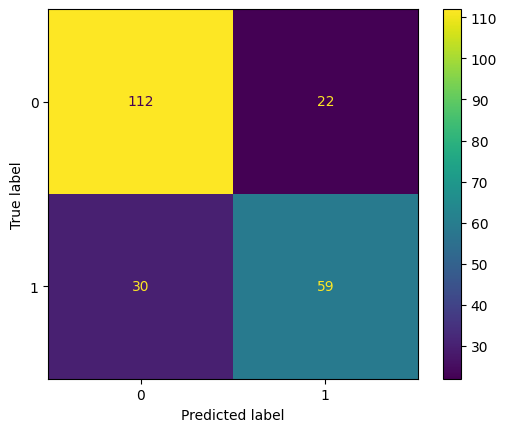

In [27]:
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
cm_display.plot()
plt.show()

In [28]:
# Classification report
cr=metrics.classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.79      0.84      0.81       134\n           1       0.73      0.66      0.69        89\n\n    accuracy                           0.77       223\n   macro avg       0.76      0.75      0.75       223\nweighted avg       0.76      0.77      0.76       223\n'